<a href="https://colab.research.google.com/github/jeevanvishwa02/Data_Science/blob/main/Classification_using_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Problem using NN 

Data dictionary and description from here: 

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip



# Read Data and Import Modules

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

## Reading the Data

In [ ]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /content/CalEnviroScreen.xlsx
100% 6.19M/6.19M [00:00<00:00, 69.5MB/s]


In [ ]:
# read data
df = pd.read_excel('CalEnviroScreen.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [ ]:
pd.set_option('display.max_columns', None) # To check all columns in the dataframe
df.head(2) #Check sample of 2 rows

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),Yes,0.064889,98.182950,15.40,97.218064,48.523809,95.544493,681.195604,80.915554,2.749604,47.81856,18551.957190,97.455725,909.14,62.977817,80.5,98.668369,45.75,89.854353,0.795,84.318814,0,0.000000,21.75,97.807121,79.958783,9.848763,99.950218,131.64,97.668620,7.44,93.835704,14.13,96.309687,53.3,95.760787,16.2,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),Yes,0.062163,91.101431,13.31,93.637725,38.556339,92.121966,904.657603,96.108270,1.365360,41.34349,7494.236622,89.049638,782.26,55.658604,66.2,97.683327,36.00,85.567693,1.250,88.767377,5,55.007738,12.00,92.171658,81.186627,10.000000,100.000000,60.66,69.779329,7.04,90.849673,12.94,92.656776,53.3,95.760787,33.4,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210


In [ ]:
df.columns  #List of all columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 

In [ ]:
raw_df=df[['Total Population','Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl',
       'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl','Poverty']]

In [ ]:
print(raw_df.shape)

(8035, 36)


# Data Cleaning

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             8035 non-null   int64  
 1   Ozone                        8035 non-null   float64
 2   Ozone Pctl                   8035 non-null   float64
 3   PM2.5                        8016 non-null   float64
 4   PM2.5 Pctl                   8016 non-null   float64
 5   Diesel PM                    8035 non-null   float64
 6   Diesel PM Pctl               8035 non-null   float64
 7   Drinking Water               8017 non-null   float64
 8   Drinking Water Pctl          8017 non-null   float64
 9   Pesticides                   8035 non-null   float64
 10  Pesticides Pctl              8035 non-null   float64
 11  Tox. Release                 8035 non-null   float64
 12  Tox. Release Pctl            8035 non-null   float64
 13  Traffic           

In [ ]:
raw_df.columns

Index(['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Asthma', 'Asthma Pctl',
       'Low Birth Weight', 'Low Birth Weight Pctl', 'Cardiovascular Disease',
       'Cardiovascular Disease Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty'],
      dtype='object')

There are NULL values in few columns in the raw_df data frame

In [ ]:
#Pct of NULLs in each column - upto two decimals
print("Total NULLs in each column are: ")
#print(round(raw_df.isna().sum()/len(raw_df),2))
raw_df.isna().sum()

Total NULLs in each column are: 


Total Population                 0
Ozone                            0
Ozone Pctl                       0
PM2.5                           19
PM2.5 Pctl                      19
Diesel PM                        0
Diesel PM Pctl                   0
Drinking Water                  18
Drinking Water Pctl             18
Pesticides                       0
Pesticides Pctl                  0
Tox. Release                     0
Tox. Release Pctl                0
Traffic                         56
Traffic Pctl                    56
Cleanup Sites                    0
Cleanup Sites Pctl               0
Groundwater Threats              0
Groundwater Threats Pctl         0
Haz. Waste                       0
Haz. Waste Pctl                  0
Imp. Water Bodies                0
Imp. Water Bodies Pctl           0
Solid Waste                      0
Solid Waste Pctl                 0
Asthma                           0
Asthma Pctl                      0
Low Birth Weight               222
Low Birth Weight Pct

There are NULLs in few columns which we can delete as they are less than 3% of total rows

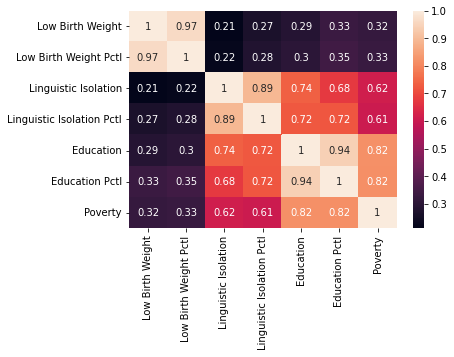

In [ ]:
#check correlation between columns which have NULLs
import seaborn as sns
sns.heatmap(raw_df[['Low Birth Weight','Low Birth Weight Pctl','Linguistic Isolation','Linguistic Isolation Pctl','Education','Education Pctl','Poverty']].corr(),annot=True)

Will be imputing the values to columns Education, Low Birth Weight and Linguistic isolation and columns with Pctl will be dropped as they have high correlation with their respective columns

In [ ]:
rep_columns=['Low Birth Weight','Linguistic Isolation','Education','PM2.5','Drinking Water','Traffic']

for i in rep_columns:
  raw_df[i].fillna(df[i].mean(), inplace=True)
#raw_df[['Low Birth Weight','Linguistic Isolation','Education']].dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#drop columns with Pctl and having NULLs as they have high correlation

drop_cols=['Ozone Pctl','Pesticides Pctl','Traffic Pctl'
,'Haz. Waste Pctl'
,'Asthma Pctl'
,'Education Pctl'
,'Drinking Water Pctl'
,'Groundwater Threats Pctl'
,'Solid Waste Pctl'
,'Cardiovascular Disease Pctl'
,'PM2.5 Pctl',
'Tox. Release Pctl',
'Cleanup Sites Pctl',
'Imp. Water Bodies Pctl'
,'Low Birth Weight Pctl'
,'Linguistic Isolation Pctl'
,'Diesel PM Pctl'
]



In [ ]:
raw_df.columns

Index(['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Asthma', 'Asthma Pctl',
       'Low Birth Weight', 'Low Birth Weight Pctl', 'Cardiovascular Disease',
       'Cardiovascular Disease Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty'],
      dtype='object')

In [ ]:
raw_df.drop(drop_cols,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
raw_df.isna().sum()

Total Population           0
Ozone                      0
PM2.5                      0
Diesel PM                  0
Drinking Water             0
Pesticides                 0
Tox. Release               0
Traffic                    0
Cleanup Sites              0
Groundwater Threats        0
Haz. Waste                 0
Imp. Water Bodies          0
Solid Waste                0
Asthma                     0
Low Birth Weight           0
Cardiovascular Disease     0
Education                  0
Linguistic Isolation       0
Poverty                   79
dtype: int64

Only column Poverty has NULLs nows which are less than 1% of the data

In [ ]:
#check the data where poverty is NULL
raw_df[raw_df['Poverty'].isna()==True].head(2) 

,Total Population,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty
7062,4864,0.035258,7.859585,22.004524,71.099208,0.000457,596.127549,1640.58,1.00,12.6,0.025,1,5.0,27.53,4.30,5.14,0.5,2.200000,NaN
7343,1038,0.029592,7.021225,3.202575,325.358480,0.000000,252.997839,564.31,30.25,12.0,0.000,14,0.5,25.14,7.55,3.73,0.6,10.417862,NaN


Remove the rows where poverty is NULL as it is the one which needs to be predicted

In [ ]:
print("Number of rows dropped - ",raw_df.isna().sum().sum(),"\n")
raw_df.dropna(inplace=True)

Number of rows dropped -  79 



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 0 to 8032
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Population        7956 non-null   int64  
 1   Ozone                   7956 non-null   float64
 2   PM2.5                   7956 non-null   float64
 3   Diesel PM               7956 non-null   float64
 4   Drinking Water          7956 non-null   float64
 5   Pesticides              7956 non-null   float64
 6   Tox. Release            7956 non-null   float64
 7   Traffic                 7956 non-null   float64
 8   Cleanup Sites           7956 non-null   float64
 9   Groundwater Threats     7956 non-null   float64
 10  Haz. Waste              7956 non-null   float64
 11  Imp. Water Bodies       7956 non-null   int64  
 12  Solid Waste             7956 non-null   float64
 13  Asthma                  7956 non-null   float64
 14  Low Birth Weight        7956 non-null   

In [ ]:
raw_df['Poverty'].median()

33.5

In [ ]:
#create the target variable based on the condition
raw_df['Poverty']=np.where(raw_df['Poverty']>raw_df['Poverty'].median(),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#check the sample data
raw_df.head(2)

,Total Population,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty
0,3174,0.064889,15.40,48.523809,681.195604,2.749604,18551.957190,909.14,80.5,45.75,0.795,0,21.75,131.64,7.44,14.13,53.3,16.2,1
1,6133,0.062163,13.31,38.556339,904.657603,1.365360,7494.236622,782.26,66.2,36.00,1.250,5,12.00,60.66,7.04,12.94,53.3,33.4,1


In [ ]:
#Check the distribution of the target variable
raw_df.Poverty = raw_df.Poverty.astype(int)
raw_df['Poverty'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    3987
1    3969
Name: Poverty, dtype: int64

### Outliers Check

In [ ]:
#Do this later
#sns.pairplot(data=raw_df)

#Check for count of outliers based on standard definition of lower quartile and upper quartile (2*IQR is used)
#Insur_data_cont
raw_df.describe()
Q1 = raw_df.quantile(0.25)
Q3 = raw_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
((raw_df < (Q1 - 2 * IQR)) | (raw_df > (Q3 + 2 * IQR))).any()

Total Population           True
Ozone                     False
PM2.5                      True
Diesel PM                  True
Drinking Water            False
Pesticides                 True
Tox. Release               True
Traffic                    True
Cleanup Sites              True
Groundwater Threats        True
Haz. Waste                 True
Imp. Water Bodies          True
Solid Waste                True
Asthma                     True
Low Birth Weight           True
Cardiovascular Disease     True
Education                  True
Linguistic Isolation       True
Poverty                   False
dtype: bool

In [ ]:
#Upper and Lower limits using standard definition. This will be used to replace the outlier values if necessary (Based on team's discussion)
dict={}
for col in raw_df.columns:
  percentile75=raw_df[col].quantile(0.75)
  percentile25=raw_df[col].quantile(0.25)
  IQR=percentile75-percentile25
  upper_limit=percentile75+2*IQR
  lower_limit=percentile25-2*IQR
  dict['upper_limit'+'_'+col]=upper_limit
  dict['lower_limit'+'_'+col]=lower_limit

dict

{'upper_limit_Total Population': 10228.25,
 'lower_limit_Total Population': -1194.25,
 'upper_limit_Ozone': 0.08511200899999999,
 'lower_limit_Ozone': 0.010137344000000013,
 'upper_limit_PM2.5': 18.75411246,
 'lower_limit_PM2.5': 1.9938313099999991,
 'upper_limit_Diesel PM': 56.0945022155,
 'lower_limit_Diesel PM': -22.673577517,
 'upper_limit_Drinking Water': 1492.9505838971495,
 'lower_limit_Drinking Water': -579.2531798353266,
 'upper_limit_Pesticides': 1.1113513935,
 'lower_limit_Pesticides': -0.7409009289999999,
 'upper_limit_Tox. Release': 10203.273080845,
 'lower_limit_Tox. Release': -6644.791489392499,
 'upper_limit_Traffic': 2672.215,
 'lower_limit_Traffic': -1042.06,
 'upper_limit_Cleanup Sites': 30.450000000000003,
 'lower_limit_Cleanup Sites': -20.3,
 'upper_limit_Groundwater Threats': 52.85,
 'lower_limit_Groundwater Threats': -34.9,
 'upper_limit_Haz. Waste': 0.675,
 'lower_limit_Haz. Waste': -0.45,
 'upper_limit_Imp. Water Bodies': 18.0,
 'lower_limit_Imp. Water Bodies':

# Data Exploration

### Hypothesis 1 - Poverty vs Education

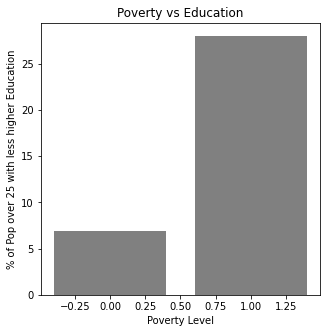

In [ ]:
#check how education is trending with poverty
#Hypothesis is if pct of pop with less higher education is more in the county, poverty will also be more. Let's check how the education is trending in both classes(Poverty =1 and Poverty =0)
hyp=raw_df.groupby(['Poverty'],as_index=False).median()
x=hyp['Poverty']
y=hyp['Education']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos,y,color='gray')
plt.xlabel('Poverty Level')
plt.ylabel('% of Pop over 25 with less higher Education')
plt.title('Poverty vs Education')
plt.show()

As we can see above, if % of population with no higher education is more, poverty population is also high. This aligns with general assumption that people with education tends to get jobs and are likely to be above the poverty line

### Hypothesis-2 Check how Low Birth Weight pct is trending in both Poverty Levels 

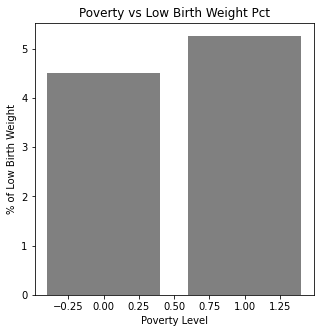

In [ ]:
#check how education is trending with poverty
#Hypothesis is if Poverty 1 class will have more pct of low birth weights
hyp=raw_df.groupby(['Poverty'],as_index=False).median()
x=hyp['Poverty']
y=hyp['Low Birth Weight']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos,y,color='gray')
plt.xlabel('Poverty Level')
plt.ylabel('% of Low Birth Weight')
plt.title('Poverty vs Low Birth Weight Pct')
plt.show()

As expected, people in poverty class are having higher low birth weights. This might be because of less healthy conditions during pregnancy which could lead to less food intake for the child

# Data Splitting

In [ ]:
#Assign target variable to Y and rest to X
Y=raw_df['Poverty']
X=raw_df.drop(['Poverty'],axis=1)

In [ ]:
print(X.shape)
print(Y.shape)

(7956, 18)
(7956,)


In [ ]:
# convert to numpy array
X = np.array(X)

In [ ]:
#Split the data into 90% training and 10% test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.1,
                                               random_state=3016014)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(7160, 18) (796, 18) (7160,) (796,)


In [ ]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)  #Fits and transforms the Train data by calculating mean and standard deviation
X_test = sc.transform(X_test)

# Data Modeling

## Model 1


1.   Dense Layers - 3
2.   Activation - relu and sigmoid
3. patience-10
4. batchsize-10
5. optimizer-rmsprop, Loss Function-binary_classifcation
6. Epochs - 10000



In [ ]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(36,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(24,activation='relu'))
# model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 dense_1 (Dense)             (None, 24)                888       
                                                                 
 dense_2 (Dense)             (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


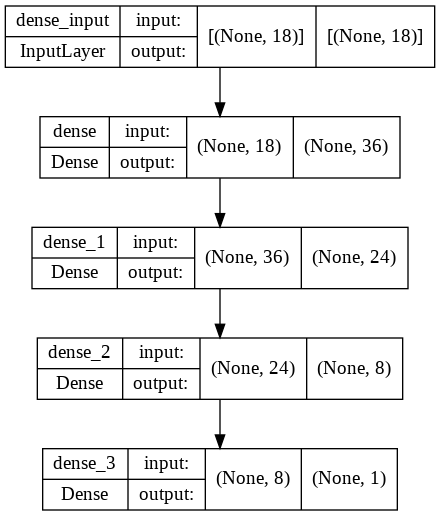

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

![image.png]()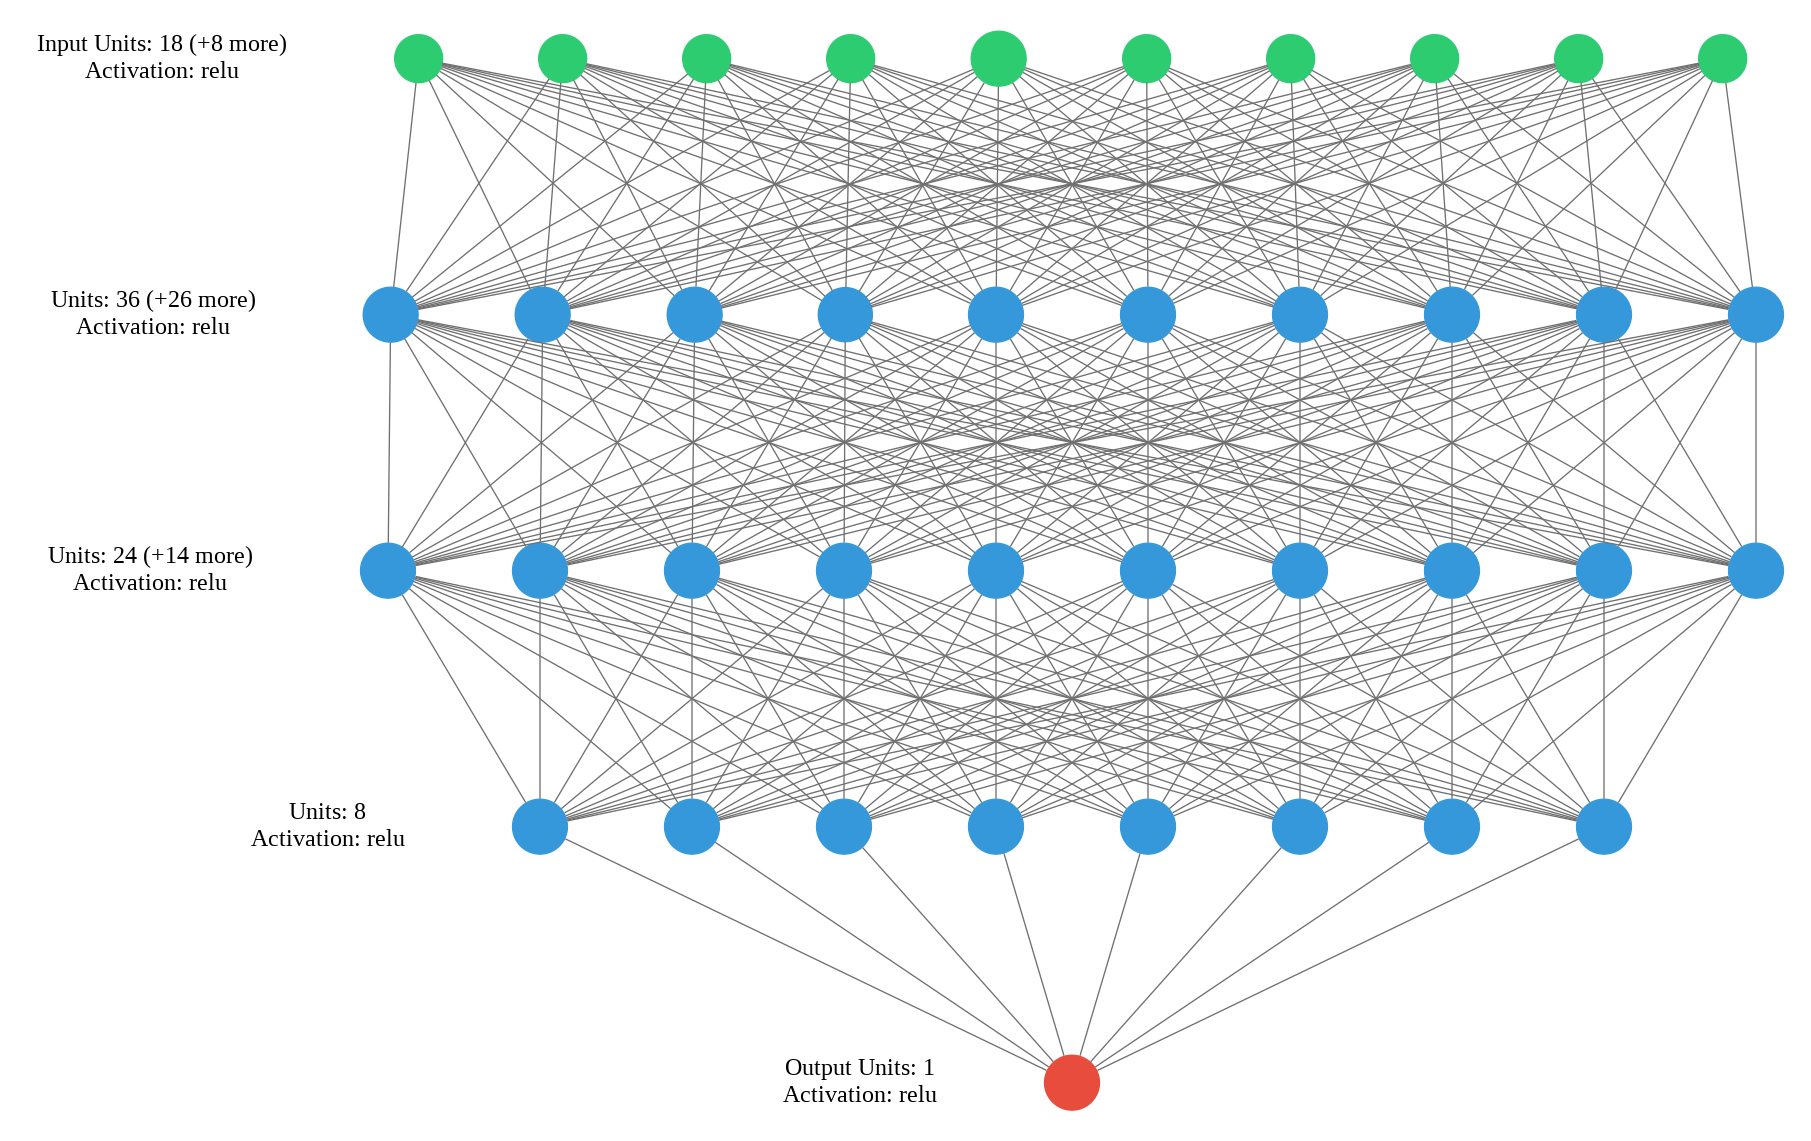

In [ ]:
# compile the model (Telling how to run based on cost function optimizer and which variable to check)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
716/716 [==============================] - 5s 5ms/step - loss: 30.9509 - accuracy: 0.5697 - val_loss: 19.2051 - val_accuracy: 0.2362
Epoch 2/100000
716/716 [==============================] - 4s 5ms/step - loss: 16.5666 - accuracy: 0.6242 - val_loss: 46.0436 - val_accuracy: 0.0402
Epoch 3/100000
716/716 [==============================] - 3s 4ms/step - loss: 12.7212 - accuracy: 0.6399 - val_loss: 2.1739 - val_accuracy: 0.6796
Epoch 4/100000
716/716 [==============================] - 3s 4ms/step - loss: 9.2564 - accuracy: 0.6367 - val_loss: 1.5062 - val_accuracy: 0.7726
Epoch 5/100000
716/716 [==============================] - 4s 5ms/step - loss: 5.8245 - accuracy: 0.6321 - val_loss: 0.3737 - val_accuracy: 0.9196
Epoch 6/100000
716/716 [==============================] - 1s 2ms/step - loss: 2.6284 - accuracy: 0.6154 - val_loss: 0.8799 - val_accuracy: 0.8530
Epoch 7/100000
716/716 [==============================] - 1s 2ms/step - loss: 0.8267 - accuracy: 0.5363 - val_loss: 0.8

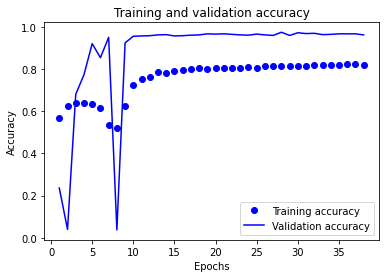

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

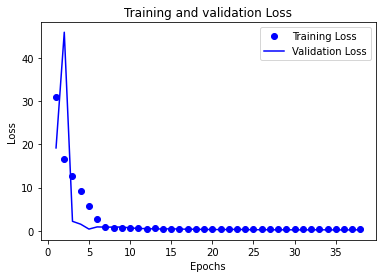

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluation

In [ ]:
# this is the max value - should correspond to
# the HIGHEST train accuracy (go look at the verbose from the model fit)
np.max(val_acc)

0.9736180901527405

In [ ]:
#Import confusion matrix related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# check model performance
preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(Y, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

array([[3782,  205],
       [1243, 2726]])

In [ ]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      3987
           1       0.93      0.69      0.79      3969

    accuracy                           0.82      7956
   macro avg       0.84      0.82      0.81      7956
weighted avg       0.84      0.82      0.81      7956



In [ ]:
#Base Model accuracy
raw_df['Poverty'].value_counts()/len(raw_df)

0    0.501131
1    0.498869
Name: Poverty, dtype: float64

### Findings

1. Training has accuracy of 81% and Validation has highest accuracy at 97%. Overall dataset has accuracy of 82%
2. Model learned quickly with in 20 epochs. Batch size is more than 20 and optimizer is Adam
3. Base model has accuracy of 50%. Current model is clearly performing better than base model
4. Model is coverging in less than 7 epochs based on validation loss graph
5. Based on above classification report, out of predicted poverty flag related counties, 93% of the time correctly prediction is correct. However recall has low value of 69% which means model is able to predict only 63% of poverty related counties



## Model 2


1.   Dense Layers - 3 , Dropoff=0.15
2.   Activation - relu and sigmoid
3. patience-10
4. batchsize-10
5. optimizer-rmsprop, Loss Function-binary_classifcation
6. Epochs - 10000



In [ ]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(36,input_shape=(X.shape[1],),activation='relu'))
model.add(Dropout(0.1)) # specify a percentage between 0 and 0.5
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 36)                684       
                                                                 
 dropout_6 (Dropout)         (None, 36)                0         
                                                                 
 dense_17 (Dense)            (None, 24)                888       
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 200       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                

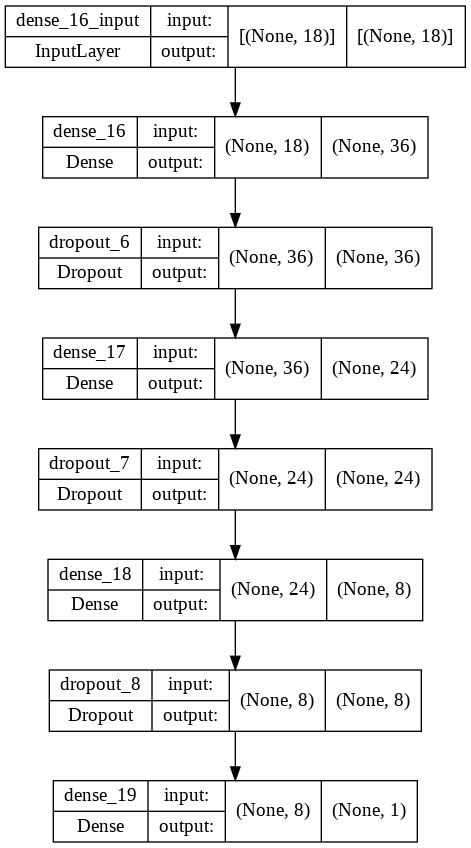

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)

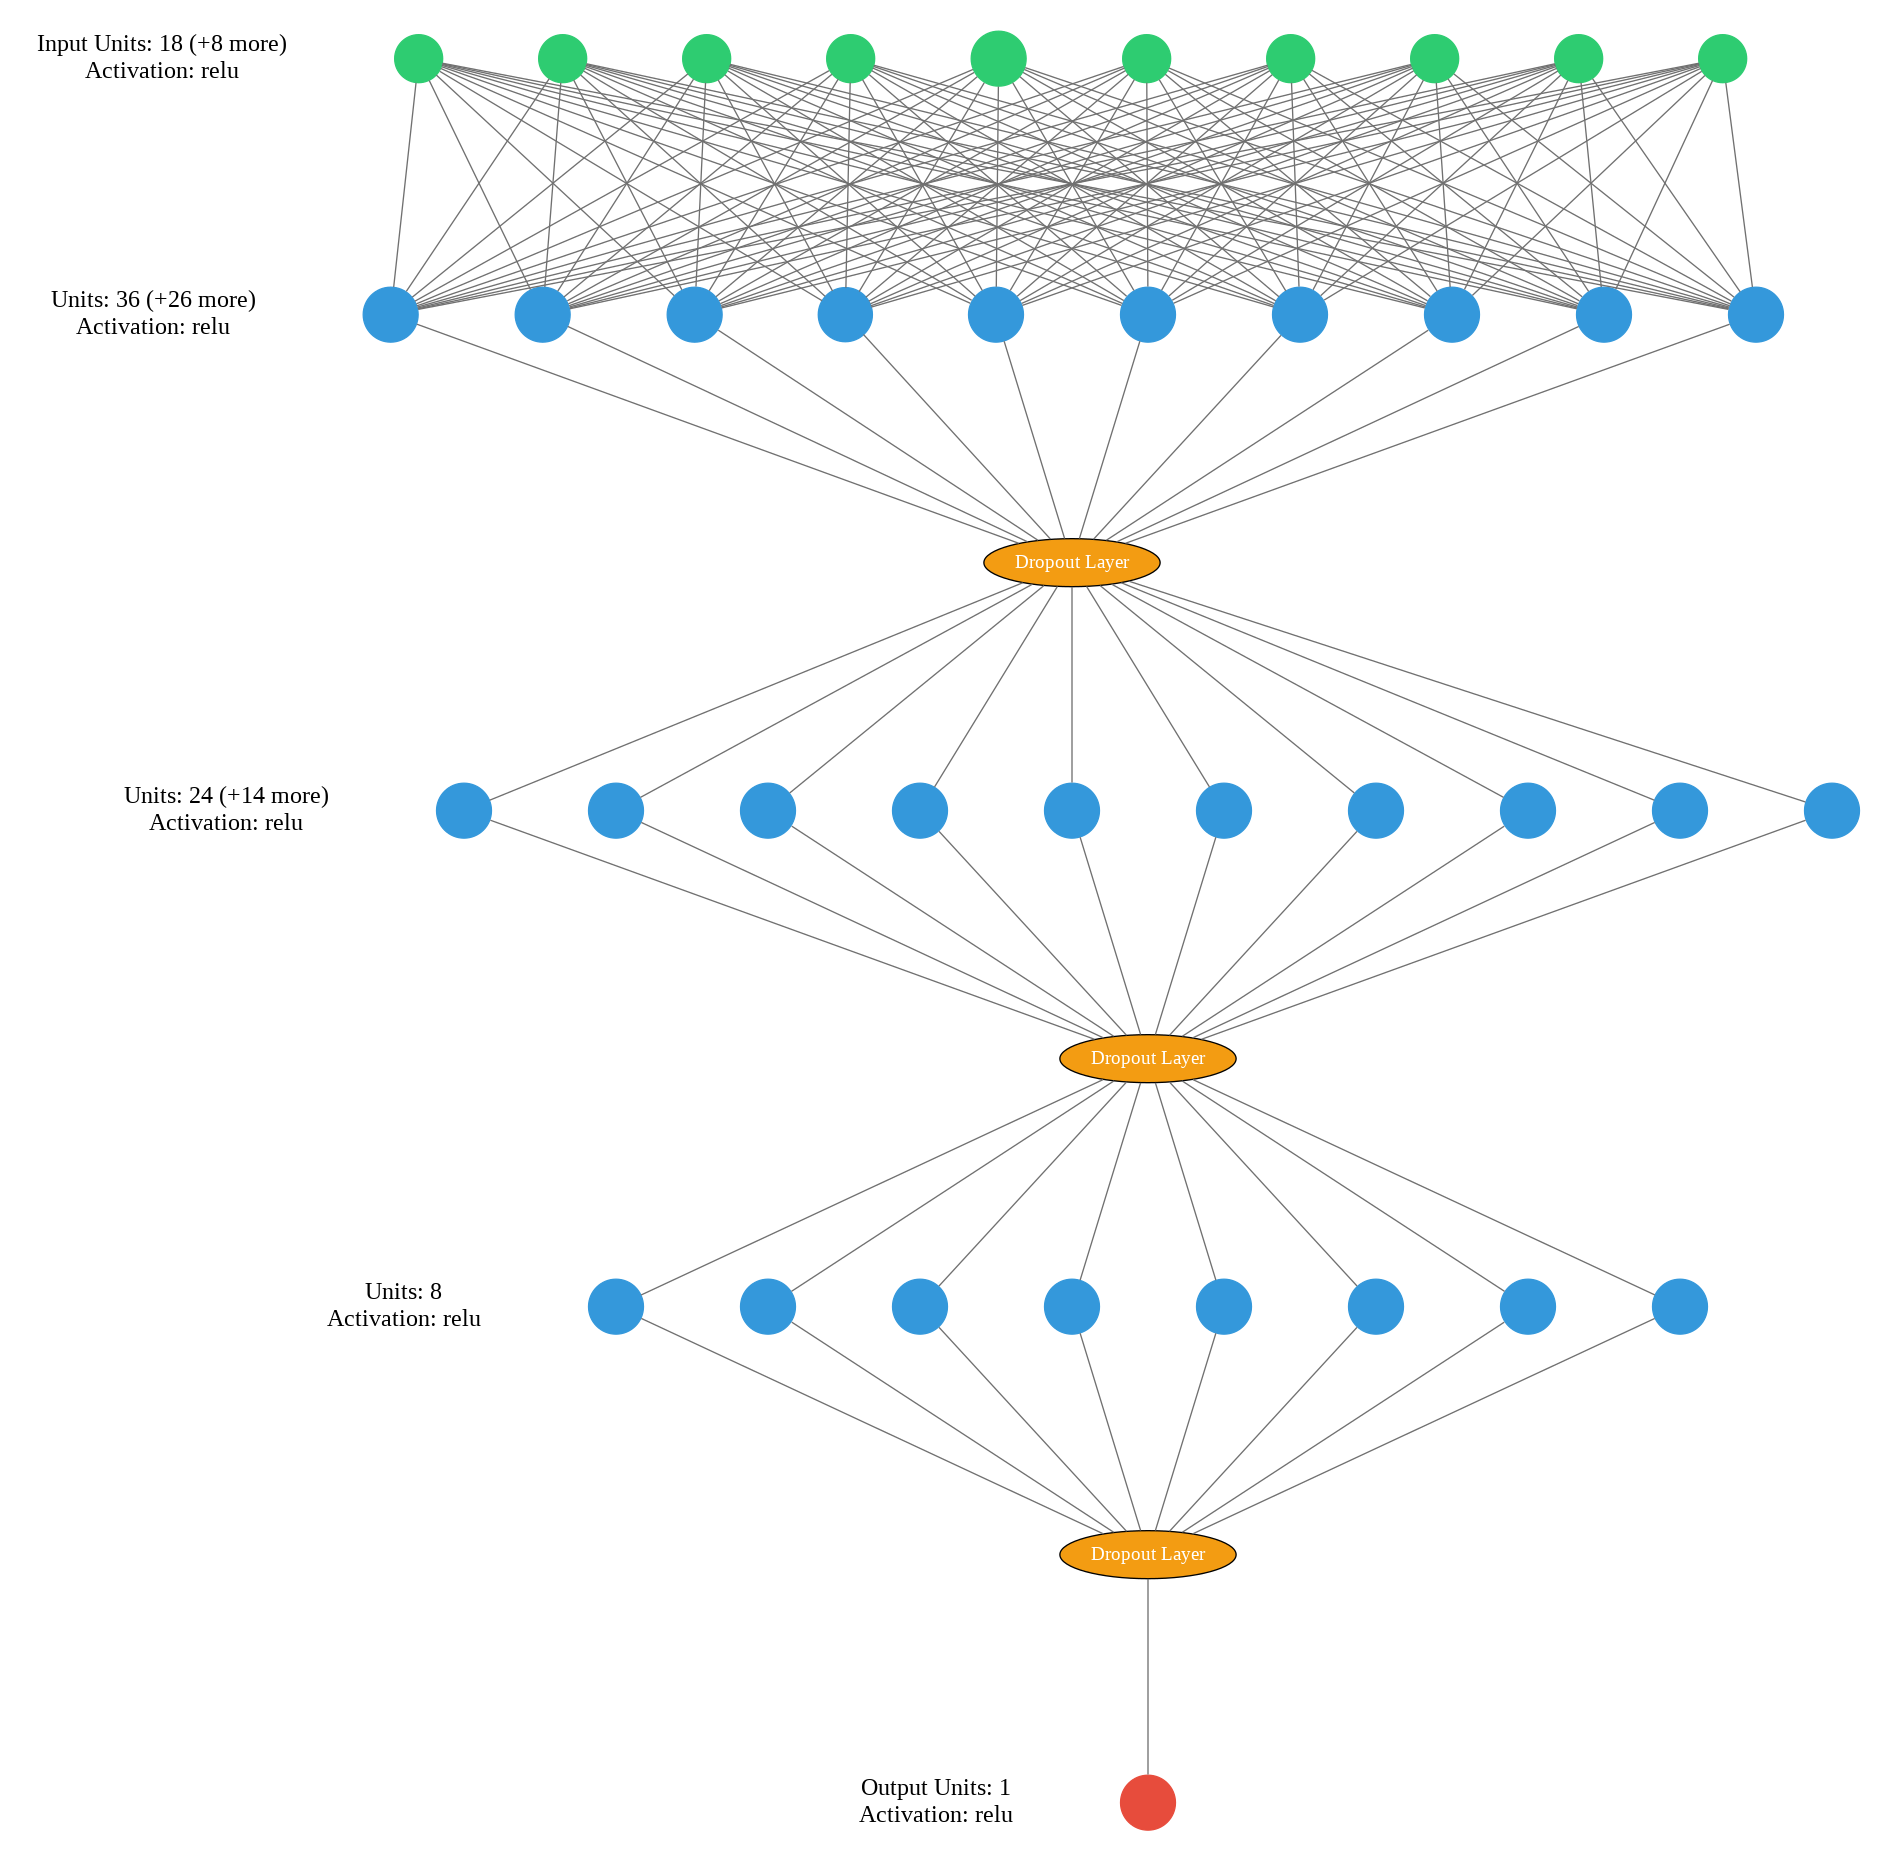

In [ ]:
# compile the model (Telling how to run based on cost function optimizer and which variable to check)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
716/716 [==============================] - 4s 4ms/step - loss: 25.5757 - accuracy: 0.5184 - val_loss: 0.7098 - val_accuracy: 0.4510
Epoch 2/100000
716/716 [==============================] - 2s 2ms/step - loss: 0.8779 - accuracy: 0.5455 - val_loss: 0.7937 - val_accuracy: 0.0389
Epoch 3/100000
716/716 [==============================] - 2s 2ms/step - loss: 0.7660 - accuracy: 0.5475 - val_loss: 0.8019 - val_accuracy: 0.0452
Epoch 4/100000
716/716 [==============================] - 1s 2ms/step - loss: 0.7765 - accuracy: 0.5547 - val_loss: 0.8088 - val_accuracy: 0.0415
Epoch 5/100000
716/716 [==============================] - 2s 2ms/step - loss: 0.7258 - accuracy: 0.5550 - val_loss: 0.7940 - val_accuracy: 0.0691
Epoch 6/100000
716/716 [==============================] - 2s 2ms/step - loss: 0.7350 - accuracy: 0.5539 - val_loss: 0.8111 - val_accuracy: 0.0427
Epoch 7/100000
716/716 [==============================] - 2s 2ms/step - loss: 1.3872 - accuracy: 0.5520 - val_loss: 0.8126 

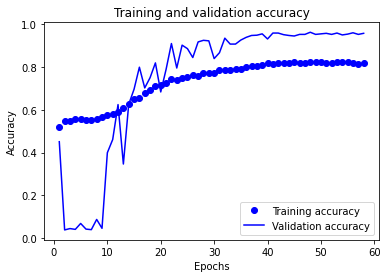

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

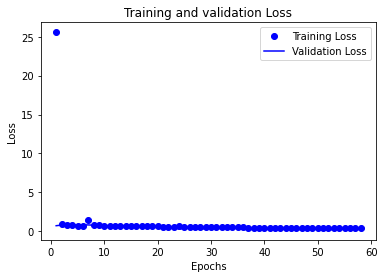

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# this is the max value - should correspond to
# the HIGHEST train accuracy (go look at the verbose from the model fit)
np.max(val_acc)

0.9623115658760071

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# see how these are numbers between 0 and 1? prob of successes (survival)
#model.predict(X)

In [ ]:
#np.round(model.predict(X),0)

In [ ]:
# here is Y
#Y

### Evaluation

In [ ]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(Y, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

# look at documentation for conf matrix on sklearn if you have questions!

array([[3637,  350],
       [ 990, 2979]])

In [ ]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      3987
           1       0.89      0.75      0.82      3969

    accuracy                           0.83      7956
   macro avg       0.84      0.83      0.83      7956
weighted avg       0.84      0.83      0.83      7956



Model accuracy slightly increased to 83% when drop-out is used

## References

--Theory

https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889?gi=2f9c5c9e79d3
https://www.geeksforgeeks.org/effect-of-bias-in-neural-network/
https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e


--Implementation

https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks
https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
https://causalml.readthedocs.io/en/latest/about.html
https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html
